# Machine Learning e Imágenes en Python

### Redes Neuronales

Considerando la base de datos mnist
* Utilice **dos** redes totalmente conectadas (fully conected) para clasificar cada imagen en los 10 tipos de dígitos y compárelas en cuanto a su desempeño y overfitting (sobreajuste a los datos de entrenamiento y mal ajuste en los datos de test).
* Utilice **dos** redes neuronales convolucionales para clasificar cada imagen en los 10 tipos de dígitos y compárelas en cuanto a su complejidad (cantidad de parámetros) y overfitting. Comente resultados
* Realice aumentación de datos utilizando una rotación de +5 y -5 grados de cada imagen. ¿Cuanto se aumenta la base?

PRIMERA RED NEURONAL FULLY CONNECTED

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 76us/sample - loss: 1.0692 - acc: 0.7053 - val_loss: 0.4325 - val_acc: 0.8896
Epoch 2/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.3489 - acc: 0.9053 - val_loss: 0.2787 - val_acc: 0.9192
Epoch 3/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.2526 - acc: 0.9284 - val_loss: 0.2275 - val_acc: 0.9362
Epoch 4/10
60000/60000 [==============================] - ETA: 0s - loss: 0.2115 - acc: 0.939 - 1s 14us/sample - loss: 0.2101 - acc: 0.9401 - val_loss: 0.2034 - val_acc: 0.9411
Epoch 5/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.1836 - acc: 0.9474 - val_loss: 0.1852 - val_acc: 0.9460
Epoch 6/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.1653 - acc: 0.9519 - val_loss: 0.1711 - val_acc: 0.9469
Epoch 7/10
60000/60000 [================

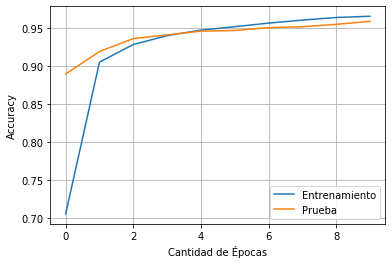

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 40)                31400     
_________________________________________________________________
dense_7 (Dense)              (None, 200)               8200      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2010      
Total params: 41,610
Trainable params: 41,610
Non-trainable params: 0
_________________________________________________________________


In [5]:
#PRIMERA RED NEURONAL FULLY CONNECTED

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np

print('PRIMERA RED NEURONAL FULLY CONNECTED')
print('')

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data() #Carga de datos

#Acondicionamos los datos de entada
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

#Procesamos las etiquetas a codificación One Hot
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

#Estructura de la red neuronal
Imagen_de_entrada = layers.Input(shape = (784,))
Capa1 = layers.Dense(units = 40, activation = 'relu')(Imagen_de_entrada)
Capa2 = layers.Dense(units = 200, activation = 'sigmoid')(Capa1)
Salida = layers.Dense(units = 10, activation = 'softmax')(Capa2) #softmax para que devuelva vector normalizado

#Instancia de clase
Red_Neuronal = keras.Model(inputs = Imagen_de_entrada, outputs = Salida)

#Compilación de modelo
Red_Neuronal.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#Entrenamos la red con nuestros datos
Historia = Red_Neuronal.fit(x = X_train, y = y_train, epochs = 10, batch_size = 1000, validation_data = (X_test, y_test))

#Grafico las métricas de mi red
plt.plot(Historia.history['acc'], label = 'Entrenamiento')
plt.plot(Historia.history['val_acc'], label = 'Prueba')
plt.grid()
plt.xlabel('Cantidad de Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Muestro arquitectura y parámetros de mi red
Red_Neuronal.summary()

SEGUNDA RED NEURONAL FULLY CONNECTED

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.9019 - acc: 0.8851 - val_loss: 0.3014 - val_acc: 0.9234
Epoch 2/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2484 - acc: 0.9365 - val_loss: 0.2135 - val_acc: 0.9489
Epoch 3/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.2048 - acc: 0.9468 - val_loss: 0.2626 - val_acc: 0.9386
Epoch 4/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.1654 - acc: 0.9573 - val_loss: 0.1720 - val_acc: 0.9563
Epoch 5/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.1251 - acc: 0.9664 - val_loss: 0.1504 - val_acc: 0.9625
Epoch 6/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.1030 - acc: 0.9701 - val_loss: 0.1450 - val_acc: 0.9624
Epoch 7/10
60000/60000 [==============================] - 8s 126us/sampl

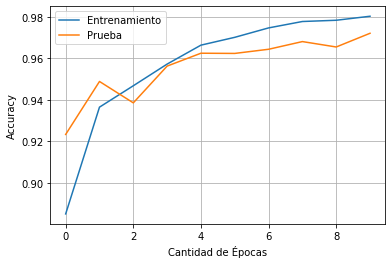

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_11 (Dense)             (None, 500)               75500     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5010      
Total params: 361,160
Trainable params: 361,160
Non-trainable params: 0
_________________________________________________________________


In [6]:
#SEGUNDA RED NEURONAL FULLY CONNECTED

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data() #Carga de datos

print('SEGUNDA RED NEURONAL FULLY CONNECTED')
print('')

#Acondicionamos los datos de entada
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

#Procesamos las etiquetas a codificación One Hot
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

#Estructura de la red neuronal
Imagen_de_entrada = layers.Input(shape = (784,))
Capa1 = layers.Dense(units = 300, activation = 'relu')(Imagen_de_entrada)
Capa2 = layers.Dense(units = 150, activation = 'relu')(Capa1)
Capa3 = layers.Dense(units = 500, activation = 'relu')(Capa2)
Salida = layers.Dense(units = 10, activation = 'softmax')(Capa3) #softmax para que devuelva vector normalizado

#Instancia de clase
Red_Neuronal = keras.Model(inputs = Imagen_de_entrada, outputs = Salida)

#Compilación de modelo
Red_Neuronal.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#Entrenamos la red con nuestros datos
Historia = Red_Neuronal.fit(x = X_train, y = y_train, epochs = 10, batch_size = 50, validation_data = (X_test, y_test))

#Grafico las métricas de mi red
plt.plot(Historia.history['acc'], label = 'Entrenamiento')
plt.plot(Historia.history['val_acc'], label = 'Prueba')
plt.grid()
plt.xlabel('Cantidad de Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Muestro arquitectura y parámetros de mi red
Red_Neuronal.summary()

**Comparación de ambas redes:**

En cuanto al desempeño de estas 2 redes fully connected que utilizamos para clasificar las imágenes de los 10 dígitos, podemos decir que la primera es más rápida y ligera y esto es por la cantidad total de parámetros utilizada que es de aproximadamente 42 mil, un número acorde al set de 60 mil datos. Además, en esta primera red se utilizaron solo 2 capas ocultas y un batch size de 1000, lo que contribuyó a la rapidez de la misma. Sumado a esto, los resultados de accurency obtenidos son bastante buenos ya que no se detecta un gran overfitting luego de 10 épocas, obteniendo accurancy de 0.967 y 0.96 en los datos de entrenamiento y de prueba respectivamente.

Por el contrario, la segunda red es muy lenta y pesada debido a la gran cantidad de parámetros que utiliza: 360 mil. Sumado a sus 3 capas ocultas y batch size 50, hace que la red sea lenta en su desempeño comparado a la primera. En cuanto a los resultados de accurancy se detecta un poco de overfitting entre train y test, el cual podría seguir aumentando en caso de agregar más parámetros a la misma.

PRIMERA RED NEURONAL CONVOLUCIONAL

(60000, 28, 28)
(60000,)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 194s 3ms/sample - loss: 0.3911 - acc: 0.9347 - val_loss: 0.1172 - val_acc: 0.9740
Epoch 2/10
60000/60000 [==============================] - 185s 3ms/sample - loss: 0.0635 - acc: 0.9861 - val_loss: 0.0489 - val_acc: 0.9880
Epoch 3/10
60000/60000 [==============================] - 176s 3ms/sample - loss: 0.0391 - acc: 0.9906 - val_loss: 0.0452 - val_acc: 0.9877
Epoch 4/10
60000/60000 [==============================] - 186s 3ms/sample - loss: 0.0281 - acc: 0.9929 - val_loss: 0.0375 - val_acc: 0.9885
Epoch 5/10
60000/60000 [==============================] - 175s 3ms/sample - loss: 0.0218 - acc: 0.9944 - val_loss: 0.0414 - val_acc: 0.9875
Epoch 6/10
60000/60000 [==============================] - 199s 3ms/samp

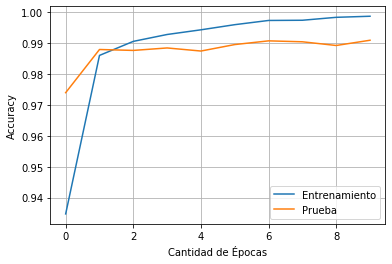

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256   

In [1]:
#PRIMERA RED NEURONAL CONVOLUCIONAL

import tensorflow
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np

print('PRIMERA RED NEURONAL CONVOLUCIONAL')
print('')

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data() #Carga de datos

print(X_train.shape)
print(y_train.shape)

#Procesamos las etiquetas a codificación One Hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#Acondicionamos los datos de entada
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

#Estructura de la red neuronal
Imagen_de_entrada = layers.Input(shape = (28, 28, 1)) #Capa de entrada
X = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None)(Imagen_de_entrada) #Capa de convolución
X = layers.BatchNormalization()(X) #Capa de normalización y relu
X = layers.Activation("relu")(X)
X = layers.MaxPooling2D(pool_size = (2, 2))(X) #Capa de pooling
X = layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = None)(X) #Segunda capa de convolución
X = layers.BatchNormalization()(X) #Capa de normalización y relu
X = layers.Activation("relu")(X)
X = layers.MaxPooling2D(pool_size = (2, 2))(X) #Capa de pooling

#Red fully connected
Flatten = layers.Flatten()(X) #Capa de flatten
X = layers.Dense(256, activation = "sigmoid")(Flatten) #Capa oculta
X = layers.Dense(64, activation = "sigmoid")(X) #Capa oculta
Salida = layers.Dense(units = 10, activation = 'softmax')(X) #Capa de salida

#Instancia de clase
Red_Neuronal = keras.Model(inputs = Imagen_de_entrada, outputs = Salida)

#Compilación de modelo
Red_Neuronal.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

#Entrenamos la red con nuestros datos
Historia = Red_Neuronal.fit(x = X_train, y = y_train, epochs = 10, batch_size = 256, validation_data = (X_test, y_test))

#Grafico las métricas de mi red
plt.plot(Historia.history['acc'], label = 'Entrenamiento')
plt.plot(Historia.history['val_acc'], label = 'Prueba')
plt.grid()
plt.xlabel('Cantidad de Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Muestro arquitectura y parámetros de mi red
Red_Neuronal.summary()

SEGUNDA RED NEURONAL CONVOLUCIONAL

(60000, 28, 28)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 90s 1ms/sample - loss: 0.1771 - acc: 0.9453 - val_loss: 0.0738 - val_acc: 0.9765
Epoch 2/10
60000/60000 [==============================] - 85s 1ms/sample - loss: 0.0542 - acc: 0.9830 - val_loss: 0.0605 - val_acc: 0.9798
Epoch 3/10
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.0377 - acc: 0.9881 - val_loss: 0.0394 - val_acc: 0.9865
Epoch 4/10
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.0302 - acc: 0.9902 - val_loss: 0.0436 - val_acc: 0.9875
Epoch 5/10
60000/60000 [==============================] - 90s 1ms/sample - loss: 0.0233 - acc: 0.9927 - val_loss: 0.0454 - val_acc: 0.9874
Epoch 6/10
60000/60000 [==============================] - 85s 1ms/sample - loss: 0.0198 - acc: 0.9936 - val_loss: 0.0408 - val_acc: 0.9872
Epoch 7/10
60000/60000 [==============================]

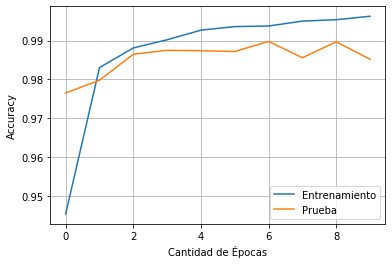

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
batch_normalization_3 (Batch (None, 11, 11, 32)        128 

In [2]:
#SEGUNDA RED NEURONAL CONVOLUCIONAL

import tensorflow
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np

print('SEGUNDA RED NEURONAL CONVOLUCIONAL')
print('')

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data() #Carga de datos

print(X_train.shape)
print(y_train.shape)

#Procesamos las etiquetas a codificación One Hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#Acondicionamos los datos de entada
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

#Estructura de la red neuronal
Imagen_de_entrada = layers.Input(shape = (28, 28, 1)) #Capa de entrada
X = layers.Conv2D(filters = 16, kernel_size = (3, 3), activation = None)(Imagen_de_entrada) #Capa de convolución
X = layers.BatchNormalization()(X) #Capa de normalización y relu
X = layers.Activation("relu")(X)
X = layers.MaxPooling2D(pool_size = (2, 2))(X) #Capa de pooling
X = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None)(X) #Segunda capa de convolución
X = layers.BatchNormalization()(X) #Capa de normalización y relu
X = layers.Activation("relu")(X)
X = layers.MaxPooling2D(pool_size = (2, 2))(X) #Capa de pooling

#Red fully connected
Flatten = layers.Flatten()(X) #Capa de flatten
X = layers.Dense(128, activation = "relu")(Flatten) #Capa oculta
X = layers.Dense(64, activation = "relu")(X) #Capa oculta
Salida = layers.Dense(units = 10, activation = 'softmax')(X) #Capa de salida

#Instancia de clase
Red_Neuronal = keras.Model(inputs = Imagen_de_entrada, outputs = Salida)

#Compilación de modelo
Red_Neuronal.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

#Entrenamos la red con nuestros datos
Historia = Red_Neuronal.fit(x = X_train, y = y_train, epochs = 10, batch_size = 128, validation_data = (X_test, y_test))

#Grafico las métricas de mi red
plt.plot(Historia.history['acc'], label = 'Entrenamiento')
plt.plot(Historia.history['val_acc'], label = 'Prueba')
plt.grid()
plt.xlabel('Cantidad de Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Muestro arquitectura y parámetros de mi red
Red_Neuronal.summary()

**Comparación de ambas redes convolucionales:**

En la segunda red, a comparación de la primera, utilizamos 4 veces menos parámetros para entrenarla y aún así obtuvimos valores de accurancy elevados, sin embargo, de esta manera nos aseguramos que no vamos a tener tanto overfitting con nuevos datos. Además redujimos el batch size, lo cual según la biografía consultada ayuda tambíen al modelo a ser más flexible ante nuevos datos.

RED CON AUMENTACIÓN DE DATOS

Cantidad de datos original:
(60000, 28, 28) (60000,)
Cantidad de datos luego de la aumentación:
(180000, 28, 28) (180000,)

Train on 180000 samples, validate on 10000 samples
Epoch 1/10
180000/180000 [==============================] - 544s 3ms/sample - loss: 0.1801 - acc: 0.9655 - val_loss: 0.0391 - val_acc: 0.9900
Epoch 2/10
180000/180000 [==============================] - 530s 3ms/sample - loss: 0.0366 - acc: 0.9901 - val_loss: 0.0332 - val_acc: 0.9892
Epoch 3/10
180000/180000 [==============================] - 578s 3ms/sample - loss: 0.0247 - acc: 0.9929 - val_loss: 0.0304 - val_acc: 0.9907
Epoch 4/10
180000/180000 [==============================] - 526s 3ms/sample - loss: 0.0179 - acc: 0.9948 - val_loss: 0.0210 - val_acc: 0.9936
Epoch 5/10
180000/180000 [==============================] - 488s 3ms/sample - loss: 0.0138 - acc: 0.9960 - val_loss: 0.0190 - val_acc: 0.9944
Epoch 6/10
180000/180000 [==============================] - 504s 3ms/sample - loss: 0

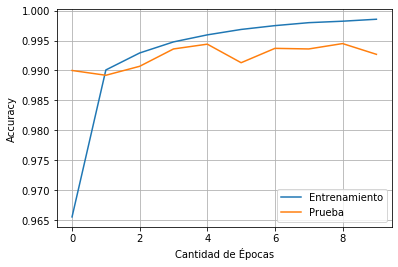

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 11, 11, 64)        256 

In [7]:
#AUMENTACIÓN DE DATOS

import tensorflow
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np
from PIL import Image

print('RED CON AUMENTACIÓN DE DATOS')
print('')

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data() #Carga de datos

print('Cantidad de datos original:')
print(X_train.shape, y_train.shape)

#Defino función de rotación de imágenes
def rotacion(imagen, angulo):
    imagen = Image.fromarray(imagen)
    imagen_rotada = imagen.rotate(angle = angulo, expand = False)
    return np.array(imagen_rotada)

#Defino función de aumentación de datos
def aumentacion(imagenes, etiquetas):
    lista_imagenes = []
    lista_etiquetas = []
    
    for i in range(imagenes.shape[0]):
        
        imagen, etiqueta = imagenes[i], etiquetas[i]

        lista_imagenes.append(imagen)
        lista_etiquetas.append(etiqueta)

        lista_imagenes.append(rotacion(imagen, 10))
        lista_etiquetas.append(etiqueta)    

        lista_imagenes.append(rotacion(imagen, -10))
        lista_etiquetas.append(etiqueta)
        
    list_aux = list(zip(lista_imagenes, lista_etiquetas))

    random.shuffle(list_aux)

    lista_imagenes, lista_etiquetas = zip(*list_aux)
    
    return np.asarray(lista_imagenes), np.asarray(lista_etiquetas)

#Aplico función de aumentación de datos al dataset

X_train, y_train = aumentacion(X_train, y_train)

print('Cantidad de datos luego de la aumentación:')
print(X_train.shape, y_train.shape)
print('')

#Procesamos las etiquetas a codificación One Hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#Acondicionamos los datos de entada
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#Estructura de la red neuronal
Imagen_de_entrada = layers.Input(shape = (28, 28, 1)) #Capa de entrada
X = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None)(Imagen_de_entrada) #Capa de convolución
X = layers.BatchNormalization()(X) #Capa de normalización y relu
X = layers.Activation("relu")(X)
X = layers.MaxPooling2D(pool_size = (2, 2))(X) #Capa de pooling
X = layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = None)(X) #Segunda capa de convolución
X = layers.BatchNormalization()(X) #Capa de normalización y relu
X = layers.Activation("relu")(X)
X = layers.MaxPooling2D(pool_size = (2, 2))(X) #Capa de pooling

#Red fully connected
Flatten = layers.Flatten()(X) #Capa de flatten
X = layers.Dense(256, activation = "sigmoid")(Flatten) #Capa oculta
X = layers.Dense(64, activation = "sigmoid")(X) #Capa oculta
Salida = layers.Dense(units = 10, activation = 'softmax')(X) #Capa de salida

#Instancia de clase
Red_Neuronal = keras.Model(inputs = Imagen_de_entrada, outputs = Salida)

#Compilación de modelo
Red_Neuronal.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

#Entrenamos la red con nuestros datos
Historia = Red_Neuronal.fit(x = X_train, y = y_train, epochs = 10, batch_size = 256, validation_data = (X_test, y_test))

#Grafico las métricas de mi red
plt.plot(Historia.history['acc'], label = 'Entrenamiento')
plt.plot(Historia.history['val_acc'], label = 'Prueba')
plt.grid()
plt.xlabel('Cantidad de Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Muestro arquitectura y parámetros de mi red
Red_Neuronal.summary()

**Aumentación de datos:**

Realizando una rotación de +5 y -5 grados de cada imagen triplicamos el tamaño de nuestro set de entrenamiento pasando de 60000 a 180000 datos. Luego volvemos a entrenar nuestro primer modelo convolucional con estos datos y obtenemos los resultados mostrados. Podemos ver cómo con una mayor cantidad de datos nuestro modelo ha mejorado tanto para los datos de entrenamiento como para los de test.